<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install prophet

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [3]:
#loading data
df=pd.read_csv('/content/train_1.csv')

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [6]:
# Reshape the data
# Melt the dataframe to have one date column and one value column for each page
df_melted = df.melt(id_vars=["Page"], var_name="Date", value_name="y")

In [7]:
df_melted.head()

,Page,Date,y
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [8]:
# Clean the data by removing rows with NaN values in 'y'
df_melted_cleaned = df_melted.dropna(subset=['y'])

In [9]:
df_melted_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73591719 entries, 0 to 79784645
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Page    object 
 1   Date    object 
 2   y       float64
dtypes: float64(1), object(2)
memory usage: 2.2+ GB


In [67]:
# Sample 1% of the data for testing
df_sampled = df_melted_cleaned.sample(frac=0.01, random_state=42)

# Check the shape of the sampled data
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735917 entries, 58357767 to 45206961
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Page    735917 non-null  object        
 1   ds      735917 non-null  datetime64[ns]
 2   y       735917 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 22.5+ MB


In [99]:
# Select a specific page (you can change this to any page in your dataset)
page_data = df_melted_cleaned[df_melted_cleaned['Page'] == 'BLACK_PINK_zh.wikipedia.org_all-access_spider']

# Prophet requires 'ds' column to be datetime type and 'y' column to be float
page_data = page_data[['ds', 'y']].reset_index(drop=True)

# Check the shape of the selected data
page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      186 non-null    datetime64[ns]
 1   y       186 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [85]:
# page_data.head()

,ds,y
0,2016-06-29,637.0
1,2016-06-30,71.0
2,2016-07-01,19.0
3,2016-07-02,14.0
4,2016-07-03,33.0


In [86]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with the selected page data
model.fit(page_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptncmeml_/bzagibnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptncmeml_/0pojnzwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72010', 'data', 'file=/tmp/tmptncmeml_/bzagibnf.json', 'init=/tmp/tmptncmeml_/0pojnzwn.json', 'output', 'file=/tmp/tmptncmeml_/prophet_modelhn092382/prophet_model-20250114102922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
# Create a dataframe for future predictions (next 30 days)
# future = model.make_future_dataframe(periods=30)

In [95]:
# Python
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
546,2017-12-27
547,2017-12-28
548,2017-12-29
549,2017-12-30
550,2017-12-31


In [96]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
546,2017-12-27,79.014387,-82.213478,265.628095
547,2017-12-28,44.269697,-132.237741,215.589694
548,2017-12-29,39.447468,-125.909165,210.917330
549,2017-12-30,48.623638,-124.689873,222.211990
550,2017-12-31,34.836857,-144.807392,215.418824


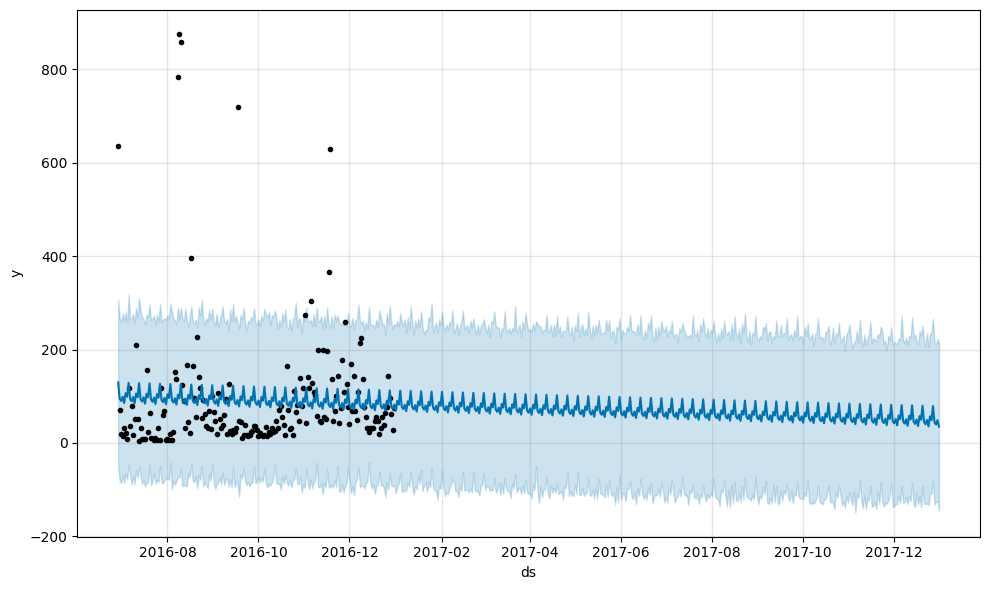

In [97]:
fig1 = model.plot(forecast)